<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded.


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride.

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones
* Visualize results on a nice dashboard

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here:

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

In [ ]:
import pandas as pd
import numpy as np
import dask.dataframe as dd

import zipfile
import os
import glob

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Extract all csv files

In [ ]:
#zip_path = '/content/drive/MyDrive/_JEDHA/Data Science FullStack/Unsupervised_ML/project_uber/uber-trip-data.zip'
filepath = '/content/drive/MyDrive/_JEDHA/Data Science FullStack/Unsupervised_ML/project_uber/uber-trip-data/'

In [ ]:
# Extract all csv files in zipfile
#with zipfile.ZipFile(zip_path, 'r') as archive:
#  archive.extractall(filepath)

#csv_files = [f for f in os.listdir(filepath) if f.endswith('.csv')]

#data = [pd.read_csv(os.path.join(filepath, file)) for file in csv_files]

In [ ]:
#csv_files = glob.glob(f"{filepath}/*14.csv")

In [ ]:
# Merge files with the same structures
#dfs = [pd.read_csv(file) for file in csv_files]

# Concatenate all DataFrames into one
#merged_df = pd.concat(dfs, ignore_index=True)

#print(f"Total rows: {merged_df.shape[0]}, Total columns: {merged_df.shape[1]}")

In [ ]:
# Save file into csv
#merged_df.to_csv(f'{filepath}merged_df.csv')

##1. Overview and Understanding the datasets

1.1 Dataset 1

In [ ]:
# Uber raw data 2014
trip_data = pd.read_csv(f'{filepath}merged_df.csv').drop('Unnamed: 0', axis=True)
print(f'Data types:\n', trip_data.dtypes)
print(f'\n',trip_data.head())

# Dataset size
print(f"Total rows: {trip_data.shape[0]}, Total columns: {trip_data.shape[1]}")

#Basic stats
print(f'\nBasic stats: \n', trip_data.describe(include='all'))

# Check missing values
print(f'\nMissing values:\n',trip_data.isnull().mean() * 100)

# Count duplicates based on key trip features
print(f'\nTotal duplicates:',trip_data.duplicated(subset=['Date/Time', 'Lat', 'Lon', 'Base']).sum())

Data types:
 Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

           Date/Time      Lat      Lon    Base
0  8/1/2014 0:03:00  40.7366 -73.9906  B02512
1  8/1/2014 0:09:00  40.7260 -73.9918  B02512
2  8/1/2014 0:12:00  40.7209 -74.0507  B02512
3  8/1/2014 0:12:00  40.7387 -73.9856  B02512
4  8/1/2014 0:12:00  40.7323 -74.0077  B02512
Total rows: 4534327, Total columns: 4

Basic stats: 
                 Date/Time           Lat           Lon     Base
count             4534327  4.534327e+06  4.534327e+06  4534327
unique             260093           NaN           NaN        5
top     4/7/2014 20:21:00           NaN           NaN   B02617
freq                   97           NaN           NaN  1458853
mean                  NaN  4.073926e+01 -7.397302e+01      NaN
std                   NaN  3.994991e-02  5.726670e-02      NaN
min                   NaN  3.965690e+01 -7.492900e+01      NaN
25%                   NaN  4.072110e+01 -7.399650e+01

The 'Date/Time' is stored as objet. Let's convert this to 'datetime'.

In [ ]:
trip_data['Date/Time'] = pd.to_datetime(trip_data['Date/Time'])

1.2 Dataset 2

In [ ]:
# Load dataset
dispatch_data = pd.read_csv(f'{filepath}/uber-raw-data-janjune-15.csv')

# Uber raw data from january to june 2015
print(f'Data types:\n', dispatch_data.dtypes)
print(dispatch_data.head())

#Basic stats
print(f'\nBasic stats: \n', dispatch_data.describe(include='all'))

# Check missing values
print(f'Missing values:\n',dispatch_data.isnull().mean() * 100)

# Count duplicates
print(f'\nTotal duplicates:',dispatch_data.duplicated().sum())

Data types:
 Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object
  Dispatching_base_num          Pickup_date Affiliated_base_num  locationID
0               B02617  2015-05-17 09:47:00              B02617         141
1               B02617  2015-05-17 09:47:00              B02617          65
2               B02617  2015-05-17 09:47:00              B02617         100
3               B02617  2015-05-17 09:47:00              B02774          80
4               B02617  2015-05-17 09:47:00              B02617          90

Basic stats: 
        Dispatching_base_num          Pickup_date Affiliated_base_num  \
count               1048575              1048575             1036592   
unique                    4               336354                 254   
top                  B02764  2015-06-17 19:26:00              B02764   
freq                 521996                  112              379229   
mean             

The 'Pickup Date' is stored as objet. Let's convert this to 'datetime'.

In [ ]:
dispatch_data['Pickup_date'] = pd.to_datetime(dispatch_data['Pickup_date'])

In [ ]:
dispatch_data.rename(columns={'locationID':'LocationID'}, inplace=True)

1.3 Dataset 3

In [ ]:
# Load 3rd dataset
nyc_data = pd.read_csv(f'{filepath}/taxi-zone-lookup.csv')

print(f'Data types:\n', nyc_data.dtypes)
print(nyc_data.head())

#Basic stats
print(f'\nBasic stats: \n', nyc_data.describe(include='all'))

# Check missing values
print(f'Missing values:\n',nyc_data.isnull().mean() * 100)

# Count duplicates
print(f'\nTotal duplicates:',nyc_data.duplicated().sum())

print(nyc_data.groupby('Borough').sum())

Data types:
 LocationID     int64
Borough       object
Zone          object
dtype: object
   LocationID        Borough                     Zone
0           1            EWR           Newark Airport
1           2         Queens              Jamaica Bay
2           3          Bronx  Allerton/Pelham Gardens
3           4      Manhattan            Alphabet City
4           5  Staten Island            Arden Heights

Basic stats: 
         LocationID Borough                                           Zone
count   265.000000     265                                            265
unique         NaN       7                                            261
top            NaN  Queens  Governor's Island/Ellis Island/Liberty Island
freq           NaN      69                                              3
mean    133.000000     NaN                                            NaN
std      76.643112     NaN                                            NaN
min       1.000000     NaN                          

##Dataset Summary:

**1. Trip data :** The first dataset provides raw trip data with exact locations. Each invidual trip records  with GPs coordinates (lat, lon).  We will call this dataset 'trip_data'.
  - Duplicates: We will not remove duplicates at this time because they're might be a high demand on specific areas and drivers may have the same pickups at the same GPS location repeatedly.
  - Date/Time: The 'Date/Time' was stored as object. The column has been converted to correct datatype.



**2. Dispatch data:** The second dataset links dispatches to a locationID (but lacks exact GPS coordinates). This will be called 'disptach_data'.
  - Duplicates: We will also keep the duplicates as multiple drivers could be dispatched for the same request before one accepts. High-demande areas may have multiple dispatches to the same location. And if a request is reassigned due to a driver canceling, it may appear multiple times with different timestamps.
  - Missing values: We have missing values on 'Affiliated_base_num' and this can be normal because some drivers may not be affiliated with a base. This will be filled with 'Unknown'.
  - Pickup_date: It was stored as object. The column has been converted to correct datatype.

**3. Location zones:** This dataset has mapping of locationID to NYC boroughs and zones. This will be our 'nyc_data'.


##2. Data Preprocessing

2.1 Feature Engineering on Date

In [ ]:
# Extract Time Features of trip_data and dispatch_data
trip_data['hour'] = trip_data['Date/Time'].dt.hour
trip_data['day'] = trip_data['Date/Time'].dt.day
trip_data['weekday'] = trip_data['Date/Time'].dt.day_name()
trip_data['month'] = trip_data['Date/Time'].dt.month

In [ ]:
dispatch_data['hour'] = dispatch_data['Pickup_date'].dt.hour
dispatch_data['day'] = dispatch_data['Pickup_date'].dt.day
dispatch_data['weekday'] = dispatch_data['Pickup_date'].dt.day_name()
dispatch_data['month'] = dispatch_data['Pickup_date'].dt.month

In [ ]:
print(trip_data.head())
print(dispatch_data.head())

            Date/Time      Lat      Lon    Base  hour  day weekday  month
0 2014-08-01 00:03:00  40.7366 -73.9906  B02512     0    1  Friday      8
1 2014-08-01 00:09:00  40.7260 -73.9918  B02512     0    1  Friday      8
2 2014-08-01 00:12:00  40.7209 -74.0507  B02512     0    1  Friday      8
3 2014-08-01 00:12:00  40.7387 -73.9856  B02512     0    1  Friday      8
4 2014-08-01 00:12:00  40.7323 -74.0077  B02512     0    1  Friday      8
  Dispatching_base_num         Pickup_date Affiliated_base_num  LocationID  \
0               B02617 2015-05-17 09:47:00              B02617         141   
1               B02617 2015-05-17 09:47:00              B02617          65   
2               B02617 2015-05-17 09:47:00              B02617         100   
3               B02617 2015-05-17 09:47:00              B02774          80   
4               B02617 2015-05-17 09:47:00              B02617          90   

   hour  day weekday  month  
0     9   17  Sunday      5  
1     9   17  Sunday      5

2.2 Missing values on dispatch_data

In [ ]:
# Fill missing values with "Unknown"
dispatch_data['Affiliated_base_num'].fillna("Unknown", inplace=True)

<ipython-input-16-ff408d11a7cc>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dispatch_data['Affiliated_base_num'].fillna("Unknown", inplace=True)


2.3 Clean dataset

In [ ]:
trip_data_cleaned = trip_data.drop(columns='Date/Time')

In [ ]:
dispatch_data_cleaned = dispatch_data.drop(columns='Pickup_date')

# 3. Compare K-Means & DBSCAN algorithms for Clustering

###3.1 To start , let's pick one day at a given hour and check the hot-zones.

In [ ]:
# Filter with 'Friday' at '18'
df_hotzone = trip_data_cleaned[(trip_data_cleaned['weekday']=='Friday') & (trip_data_cleaned['hour'] ==17)]
df_hotzone = df_hotzone.sample(n=50000, random_state=42)

In [ ]:
print(df_hotzone.head())
print(df_hotzone.size)

             Lat      Lon    Base  hour  day weekday  month
2044888  40.7449 -73.9928  B02682    17   11  Friday      7
2708998  40.7194 -73.9628  B02617    17   19  Friday      9
4515375  40.7199 -73.9989  B02682    17   30  Friday      5
1133670  40.7666 -73.9792  B02617    17   25  Friday      4
3092149  40.7040 -74.0116  B02764    17   12  Friday      9
350000


In [ ]:
# Visualization of hot-zones
fig = px.scatter_mapbox(df_hotzone,
                     lat='Lat',
                     lon ='Lon',
                     mapbox_style='open-street-map',
                     color ='weekday',
                     zoom = 10,
                     center = {'lat': 40.7128, 'lon': -74.0060},
                     )

fig.update_layout(
      title_text="Hot Zones in New York on a Friday at 5pm",
      title_x=0.5,
      width =1100,
      height =700
      )

fig.show()

##3.2 Apply K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
scaler = StandardScaler()

X = df_hotzone[['Lat', 'Lon']]

X = scaler.fit_transform(X)

**Let's use the Elbow method to find the best k**

In [ ]:
wcss = []
k_range = range(1,11)

for k in k_range :
  kmeans = KMeans(n_clusters =k,random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
  print(f"WCSS for K={k} --> {wcss[-1]}")

WCSS for K=1 --> 99999.99999999997
WCSS for K=2 --> 74133.89287210233
WCSS for K=3 --> 51741.70133897771
WCSS for K=4 --> 42286.291863677245
WCSS for K=5 --> 36518.51597789142
WCSS for K=6 --> 31063.263646257907
WCSS for K=7 --> 27794.200876898514
WCSS for K=8 --> 23018.988596169624
WCSS for K=9 --> 18572.69424183425
WCSS for K=10 --> 17047.21683622945


**Visualize the elbow method results**

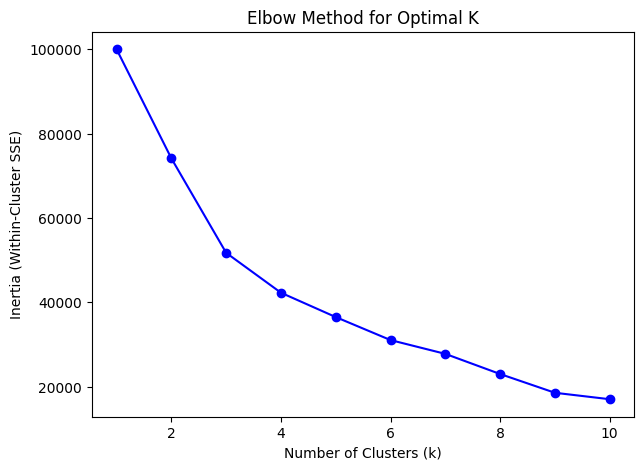

In [ ]:
# Plot Elbow Method
plt.figure(figsize=(7,5))
plt.plot(k_range, wcss,'bo-', markersize=6)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()

Based on the results, the “elbow” point, where the rate of decrease in inertia slows down, is observed at k = 3.

**Let's apply K-means to our X**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_hotzone['kmeans_cluster'] = kmeans.fit_predict(X)

print(df_hotzone.loc[:,'kmeans_cluster'].value_counts())

kmeans_cluster
2    27197
1    21590
0     1213
Name: count, dtype: int64


In [ ]:
print(kmeans.cluster_centers_)

[[-1.64152759  4.23355481]
 [-0.67320762 -0.37081955]
 [ 0.61189474  0.10732093]]


In [ ]:
# Visualization of K-means Cluster Centers
centroids = kmeans.cluster_centers_

# create scatter plot
fig_kmeans = px.scatter_map(df_hotzone,
                        lat='Lat',
                        lon ='Lon',
                        color ='kmeans_cluster',
                        center={"lat": 40.7128, "lon": -74.0060},
                        title="K-Means Clustering",
                        zoom =8,
                        )

fig_kmeans.update_layout(
    title_x=0.5,
    height=600,
    width=1000)
fig_kmeans.show()

Even after applying K-Means, there are points that are too far from their assigned centroid. This is as expected when using K-means. These points are our outliers. Low-density areas get clustered incorrectly.

##3.3 Apply DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
# Apply DBSCAN
dbscan = DBSCAN(eps=0.1, metric='manhattan', min_samples=100, n_jobs=-1)

df_hotzone['dbscan_cluster'] = dbscan.fit_predict(X)
print(df_hotzone['dbscan_cluster'].value_counts())

dbscan_cluster
 0    39888
-1     6687
 3      905
 1      814
 4      811
 2      652
 5      243
Name: count, dtype: int64


In [ ]:
# Visualization of DBSCAN
fig_dbscan = px.scatter_map(
    df_hotzone[df_hotzone['dbscan_cluster'] !=-1],
    lat ='Lat',
    lon ='Lon',
    color ='dbscan_cluster',
    map_style='open-street-map',
    center={"lat": 40.7128, "lon": -74.0060},
    title="DBSCAN Clustering of pickup locations",
    zoom =10
    )

fig_dbscan.update_layout(
    title_x=0.5,
    height=600,
    width=1000)
fig_dbscan.show()

Our DBSCAN model has correctly identified Uber pickup hot-zones on a friday at 5pm at the following locations:
- JFK Aiport
- LaGuardia Airport
- Newark Airport
- Downtown Manhattan
- Downtown Brooklyn
- Williamsburg

These are known high-demand Uber pickup areas and the model has correctly separated key locations such as major transport hubs and NYC business districts.